# (a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import det, inv
import pandas as pd
from sklearn.model_selection import train_test_split

In [141]:
A = np.array([[1,2,1,-1],[-1,1,0,2],[0,-1,-2,1]])
b = np.array([3,2,-2]).reshape(3,1)
A_t = A.T
x0 = np.array([1,1,1,1]).reshape(4,1)

In [146]:
def find_X(A, A_t, b, x0, alpha):
    X = []
    X.append(x0)
    x = x0
    k = 1
    while True:
        delta = -A_t@b + A_t@A@x + 0.2*x
        delta_2norm = np.linalg.norm(delta, ord=2)
        
        if delta_2norm < 0.001 or k >= 10000:
            break
          
        X_ = x - alpha*delta
        x = X_
        X.append(X_)
        k = k + 1
        
    return X 

In [143]:
X = find_X(A, A_t, b, x0, 0.1)
length = len(X)

In [144]:
for i in range(0,6):
    x = X[i].T[0]
    print("k={},    x(k)=[{},{},{},{}]".format(i,round(x[0],4) ,round(x[1],4), round(x[2],4), round(x[3],4)))
    

for j in range(length-5,length):
    x = X[j].T[0]
    print("k={},  x(k)=[{},{},{},{}]".format(j,round(x[0],4) ,round(x[1],4), round(x[2],4), round(x[3],4)))

k=0,    x(k)=[1,1,1,1]
k=1,    x(k)=[0.98,0.98,0.98,0.98]
k=2,    x(k)=[0.9624,0.9804,0.9744,0.9584]
k=3,    x(k)=[0.9427,0.9824,0.9668,0.9433]
k=4,    x(k)=[0.9234,0.9866,0.9598,0.9295]
k=5,    x(k)=[0.9044,0.9916,0.9526,0.9169]
k=272,  x(k)=[0.0666,1.3366,0.4928,0.3251]
k=273,  x(k)=[0.0666,1.3366,0.4928,0.325]
k=274,  x(k)=[0.0665,1.3366,0.4927,0.325]
k=275,  x(k)=[0.0664,1.3367,0.4927,0.3249]
k=276,  x(k)=[0.0663,1.3367,0.4927,0.3249]


# (c)

In [88]:
x_hat = inv(A_t@A + 0.2*np.identity(4))@A_t@b
x_hat

array([[0.06285483],
       [1.33819951],
       [0.49067315],
       [0.32238443]])

# (d)

In [7]:
alphas = 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.02, 0.1, 0.15

In [8]:
def find_delta(A, A_t, b, x0, x_hat, alpha):
    Delta_2norms = []
    X = find_X(A, A_t, b, x0, alpha)
    for x in X:
        delta = x - x_hat
        delta_2norm = np.linalg.norm(delta, ord=2) 
        Delta_2norms.append(delta_2norm)
    del Delta_2norms[0] #delete k = 0, because we need to draw from k=1
    return Delta_2norms   

In [9]:
def graphs(A, A_t, b, x0, x_hat, alpha):
    Delta_2norms = find_delta(A, A_t, b, x0, x_hat, alpha)
    k = np.arange(1,len(Delta_2norms)+1)
        
    plt.subplot(3,3,i)
    plt.plot(k,Delta_2norms)
    plt.axhline(0.001, color = 'red')
    
    plt.xlabel("k")                                    
    plt.ylabel("Delta_2norm")
    plt.title("alpha="+str(alpha))

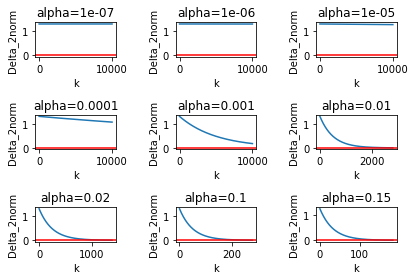

In [10]:
i = 1
for alpha in alphas:
    plt.subplot(3,3,i)
    graphs(A, A_t, b, x0, x_hat, alpha)
    i = i + 1

plt.tight_layout()
plt.show()

# (e)

In [152]:
data = pd.read_csv('CarSeats.csv')
categorical_predictors = ['ShelveLoc','Urban','US']
numerical_data = data.drop(categorical_predictors, axis=1)
response = ['Sales']
predictors=[x for x in list(numerical_data.columns) if x not in response]

In [153]:
from sklearn.preprocessing import StandardScaler

In [154]:
scaler = StandardScaler()
numerical_data[predictors] = scaler.fit_transform(numerical_data[predictors])
#numerical_data[predictors]

In [155]:
numerical_data[predictors].mean()

CompPrice      3.483325e-16
Income         5.162537e-17
Advertising   -6.161738e-17
Population     1.454392e-16
Price         -6.994405e-17
Age            1.786071e-16
Education     -2.534084e-16
dtype: float64

In [156]:
numerical_data[predictors].var()

CompPrice      1.002506
Income         1.002506
Advertising    1.002506
Population     1.002506
Price          1.002506
Age            1.002506
Education      1.002506
dtype: float64

In [158]:
target_mean = numerical_data[response].mean()
numerical_data[response] = numerical_data[response]-target_mean

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(numerical_data.iloc[:,1:], numerical_data.iloc[:,0], test_size=0.5, shuffle=False)

In [23]:
X_train.head(1)

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449


In [24]:
X_train.tail(1)

,CompPrice,Income,Advertising,Population,Price,Age,Education
199,-0.19425,0.692014,-0.246159,0.476656,0.431555,0.659918,0.038208


In [25]:
X_test.head(1)

,CompPrice,Income,Advertising,Population,Price,Age,Education
200,1.242219,0.835121,-0.998939,0.57177,1.277326,0.536309,-0.725953


In [26]:
X_test.tail(1)

,CompPrice,Income,Advertising,Population,Price,Age,Education
399,0.589279,-1.132606,-0.998939,-1.615848,0.177823,-0.26715,0.802369


In [27]:
Y_train.head(1)

0    2.003675
Name: Sales, dtype: float64

In [28]:
Y_train.tail(1)

199   -1.076325
Name: Sales, dtype: float64

In [29]:
Y_test.head(1)

200   -1.936325
Name: Sales, dtype: float64

In [30]:
Y_test.tail(1)

399    2.213675
Name: Sales, dtype: float64

# (g)

In [160]:
X_transpose = X_train.T

In [161]:
B_ridge = np.linalg.inv(X_transpose@X_train + 0.5*np.identity(7))@X_transpose@Y_train
B_ridge

0    1.674911
1    0.368707
2    1.109761
3    0.020805
4   -2.321392
5   -0.519396
6   -0.149282
dtype: float64

# (i)

In [162]:
B0 = pd.DataFrame({'CompPrice':[1],
                    'Income':[1],
                    'Advertising':[1],
                    'Population':[1],
                    'Price':[1],
                    'Age':[1],
                    'Education':[1]   
                  })

In [163]:
b0 = B0.values.reshape(7,1)
x = X_train.values.reshape(200,7)
x_t = x.T.reshape(7,200)
y = Y_train.values.reshape(200,1)

In [164]:
loss_hat = np.linalg.norm(y - x@B_ridge, ord = 2 )**2/200 + 0.5*np.linalg.norm(B_ridge, ord = 2 )**2
loss_hat

1732.27024094426

In [165]:
alphas = [0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01]

In [166]:
def loss_function(y, x, B):
    loss = np.linalg.norm(y - x@B, ord = 2 )**2/200 + 0.5*np.linalg.norm(B, ord = 2 )**2
    return loss

In [167]:
def find_beta(b0, x, y, x_t,alpha):
    b = b0
    Betas = []
    Betas.append(b)
    for k in range(1, 1001):
        B = b - alpha*(-2*x_t@(y-x@b) + 200*b)/200
        b = B
        Betas.append(B)
        
    return Betas   

In [168]:
def find_delta(b0, x, y, x_t,loss_hat,alpha):
    Deltas = []
    Betas = find_beta(b0, x, y, x_t,alpha)
    
    for B in Betas:        
        loss = np.linalg.norm(y - x@B, ord = 2 )**2/200 + 0.5*np.linalg.norm(B, ord = 2 )**2     
        delta = loss - loss_hat
        Deltas.append(delta)
    return Deltas

In [169]:
def ridge_graph(b0, x, y, x_t, loss_hat, alpha):
    deltas = find_delta(b0, x, y, x_t, loss_hat, alpha)
    k = np.arange(0,len(deltas)) 
    
    plt.plot(k, deltas, color='blue')      
    plt.xlabel("k")                                    
    plt.ylabel("Delta")
    plt.title("alpha="+str(alpha),pad=15)

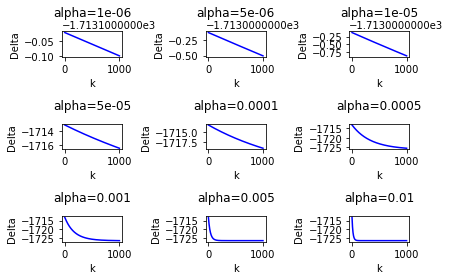

In [170]:
i = 1
for alpha in alphas:
    plt.subplot(3,3,i)
    ridge_graph(b0, x, y, x_t, loss_hat, alpha)
    i = i + 1

plt.tight_layout()
plt.show()

In [82]:
Betas = find_beta(b0, x, y, x_t,0.01)
B = Betas[1000]

In [47]:
train_mse = (np.linalg.norm(y - x@B , ord = 2)**2)/200

y_ts = Y_test.values.reshape(200,1)
x_ts= X_test.values.reshape(200,7)
test_mse = (np.linalg.norm(y_ts - x_ts@B , ord = 2)**2)/200

In [48]:
print("The train MSE is {}".format(train_mse))
print("The test MSE is {}".format(test_mse))

The train MSE is 4.558906724365395
The test MSE is 4.380429183271841


# (j)

In [49]:
sgd_alphas = [0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.006, 0.02]

In [50]:
def sgd_betas(b0, X_train,Y_train, alpha):
    b = b0
    sgd_B = []
    sgd_B.append(b)
    for i in range(1,1001):
        i = i % 200
        if i == 0:
            i = 200
        X = X_train.loc[i-1]
        Y = Y_train.loc[i-1]
    
        x = X.values.reshape(7,1)
        x_t = x.T 
    
        B = b - alpha*(-2*x@(Y-x_t@b)+b)
        sgd_B.append(B)
        b = B
    return sgd_B

In [51]:
def sgd_deltas(b0, X_train, Y_train, loss_hat, alpha):
    y = Y_train.values.reshape(200,1)
    x = X_train.values
    sgd_del = []
    sgd_B = sgd_betas(b0, X_train,Y_train, alpha)
    for B in sgd_B:
        loss = np.linalg.norm(y - x@B, ord = 2 )**2/200 + 0.5*np.linalg.norm(B, ord = 2 )**2
        delta = loss - loss_hat
        sgd_del.append(delta)
    return sgd_del   

In [52]:
def sgd_graph(b0, X_train, Y_train, loss_hat, alpha):
    sgd_Delta = sgd_deltas(b0, X_train, Y_train, loss_hat, alpha)
    k = np.arange(0,len(sgd_Delta)) 
    

    plt.plot(k, sgd_Delta, color='blue')      
    plt.xlabel("k")                                    
    plt.ylabel("sgd_Delta")
    plt.title("alpha="+str(alpha),pad=15)

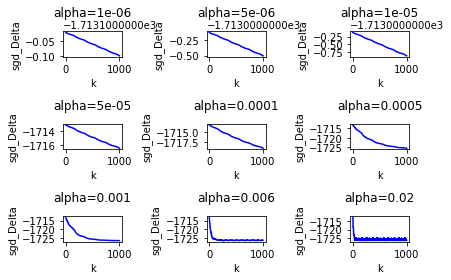

In [53]:
i = 1
for alpha in sgd_alphas:
    plt.subplot(3,3,i)
    sgd_graph(b0, X_train, Y_train, loss_hat, alpha)
    i = i + 1

plt.tight_layout()
plt.show()

In [54]:
sgd_B =sgd_betas(b0, X_train,Y_train, 0.006)
print(len(sgd_B))

1001


In [55]:
B_ = sgd_B[1000]
train_mse = (np.linalg.norm(y - x@B_ , ord = 2)**2)/200
test_mse = (np.linalg.norm(y_ts - x_ts@B_ , ord = 2)**2)/200

In [56]:
print("The train MSE is {}".format(train_mse))
print("The test MSE is {}".format(test_mse))

The train MSE is 4.661749176041872
The test MSE is 4.447228989660328
